In [9]:
!pip install category_encoders
!pip install lightgbm 
# Core Data Handling
import pandas as pd
import numpy as np

# Data Cleaning & Preprocessing
import re
import datetime
from sklearn import preprocessing

#  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# SQL & Database Integration
import sqlite3
from sqlalchemy import create_engine
import pandas.io.sql as psql

# Utilities
import os
import pathlib
import warnings

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [28]:
df_names = pd.read_excel('Names.xlsx')
print("First 5 rows of df_names:")
print(df_names.head())

print("\nDataFrame Info:")
df_names.info()

print("\nColumn Names:")
print(df_names.columns)

First 5 rows of df_names:
  Customer ID                    name
0         Id1       Hawks, Ms.  Kelly
1         Id2  Lehner, Mr.  Matthew D
2         Id3           Lu, Mr.  Phil
3         Id4    Osborne, Ms.  Kelsey
4         Id5    Kadala, Ms.  Kristyn

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB

Column Names:
Index(['Customer ID', 'name'], dtype='object')


In [31]:
# Load the CSV file into a pandas DataFrame
df_medical = pd.read_csv('Medical_Examinations.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of df_medical:")
print(df_medical.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df_medical.info()

# Display the column names of the DataFrame
print("\nColumn Names:")
print(df_medical.columns)

First 5 rows of df_medical:
  Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         Id1  47.410   7.47           No              No             No   
1         Id2  30.360   5.77           No              No             No   
2         Id3  34.485  11.87          yes              No             No   
3         Id4  38.095   6.05           No              No             No   
4         Id5  35.530   5.45           No              No             No   

  NumberOfMajorSurgeries smoker  
0       No major surgery    yes  
1       No major surgery    yes  
2                      2    yes  
3       No major surgery    yes  
4       No major surgery    yes  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     

In [35]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_hospitalization = pd.read_csv('Hospitalisation_details.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of df_hospitalization:")
print(df_hospitalization.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df_hospitalization.info()

# Display the column names of the DataFrame
print("\nColumn Names:")
print(df_hospitalization.columns)

First 5 rows of df_hospitalization:
  Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID  
0    R1013  
1    R1013  
2    R1013  
3    R1013  
4    R1013  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-n

In [36]:
# Identify the common column for merging: 'Customer ID'

# Merge df_names with df_medical using 'Customer ID' as the key (inner join)
df_merged_temp = pd.merge(df_names, df_medical, on='Customer ID', how='inner')

# Merge df_merged_temp with df_hospitalization using 'Customer ID' as the key (inner join)
df_collated_data = pd.merge(df_merged_temp, df_hospitalization, on='Customer ID', how='inner')

# Display the first 5 rows of the final merged DataFrame
print("First 5 rows of df_collated_data:")
print(df_collated_data.head())

# Display a concise summary of the final merged DataFrame
print("\nDataFrame Info for df_collated_data:")
df_collated_data.info()

First 5 rows of df_collated_data:
  Customer ID                    name     BMI  HBA1C Heart Issues  \
0         Id1       Hawks, Ms.  Kelly  47.410   7.47           No   
1         Id2  Lehner, Mr.  Matthew D  30.360   5.77           No   
2         Id3           Lu, Mr.  Phil  34.485  11.87          yes   
3         Id4    Osborne, Ms.  Kelsey  38.095   6.05           No   
4         Id5    Kadala, Ms.  Kristyn  35.530   5.45           No   

  Any Transplants Cancer history NumberOfMajorSurgeries smoker  year month  \
0              No             No       No major surgery    yes  1968   Oct   
1              No             No       No major surgery    yes  1977   Jun   
2              No             No                      2    yes  1970     ?   
3              No             No       No major surgery    yes  1991   Jun   
4              No             No       No major surgery    yes  1989   Jun   

   date  children   charges Hospital tier City tier State ID  
0    12         0  

In [37]:
print("Missing values in df_collated_data:")
print(df_collated_data.isnull().sum())

Missing values in df_collated_data:
Customer ID               0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
dtype: int64


In [38]:
trivial_value_counts = {}

for col in df_collated_data.columns:
    count_trivial = (df_collated_data[col] == '?').sum()
    if count_trivial > 0:
        percentage_trivial = (count_trivial / len(df_collated_data)) * 100
        trivial_value_counts[col] = {
            'count': count_trivial,
            'percentage': percentage_trivial
        }

if trivial_value_counts:
    print("Columns with trivial value '?' and their impact:")
    for col, data in trivial_value_counts.items():
        print(f"- Column '{col}': {data['count']} occurrences ('?' = {data['percentage']:.2f}% of rows)")
else:
    print("No trivial values '?' found in any column.")

Columns with trivial value '?' and their impact:
- Column 'smoker': 2 occurrences ('?' = 0.09% of rows)
- Column 'year': 2 occurrences ('?' = 0.09% of rows)
- Column 'month': 3 occurrences ('?' = 0.13% of rows)
- Column 'Hospital tier': 1 occurrences ('?' = 0.04% of rows)
- Column 'City tier': 1 occurrences ('?' = 0.04% of rows)
- Column 'State ID': 2 occurrences ('?' = 0.09% of rows)


In [39]:
initial_rows = len(df_collated_data)

# Filter out rows where any column contains '?'
df_collated_data = df_collated_data[~(df_collated_data == '?').any(axis=1)]

# Display the new shape of the DataFrame
print(f"Original number of rows: {initial_rows}")
print(f"Number of rows after removing trivial values: {len(df_collated_data)}")
print(f"New shape of df_collated_data: {df_collated_data.shape}")

# Verify that there are no trivial '?' values left
remaining_trivial_counts = {}
for col in df_collated_data.columns:
    count_trivial = (df_collated_data[col] == '?').sum()
    if count_trivial > 0:
        remaining_trivial_counts[col] = count_trivial

if remaining_trivial_counts:
    print("\nRemaining trivial '?' values found:")
    for col, count in remaining_trivial_counts.items():
        print(f"- Column '{col}': {count} occurrences")
else:
    print("\nNo trivial '?' values found after removal.")

# Verify that there are no missing values after removal
print("\nMissing values after removing rows with trivial values:")
print(df_collated_data.isnull().sum())

Original number of rows: 2335
Number of rows after removing trivial values: 2325
New shape of df_collated_data: (2325, 17)

No trivial '?' values found after removal.

Missing values after removing rows with trivial values:
Customer ID               0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
dtype: int64


In [40]:
# 1. Define custom ordering for 'Hospital tier'
hospital_tier_order = ['tier - 1', 'tier - 2', 'tier - 3']
hospital_tier_dtype = pd.CategoricalDtype(categories=hospital_tier_order, ordered=True)
df_collated_data['Hospital tier'] = df_collated_data['Hospital tier'].astype(hospital_tier_dtype)

# 2. Define custom ordering for 'City tier'
city_tier_order = ['tier - 1', 'tier - 2', 'tier - 3']
city_tier_dtype = pd.CategoricalDtype(categories=city_tier_order, ordered=True)
df_collated_data['City tier'] = df_collated_data['City tier'].astype(city_tier_dtype)

# 3. Define custom ordering for 'NumberOfMajorSurgeries'
surgeries_order = ['No major surgery', '1', '2', '3', '4', '5']
surgeries_dtype = pd.CategoricalDtype(categories=surgeries_order, ordered=True)
df_collated_data['NumberOfMajorSurgeries'] = df_collated_data['NumberOfMajorSurgeries'].astype(surgeries_dtype)

# 4. Convert 'year' column to integer data type
df_collated_data['year'] = df_collated_data['year'].astype(int)

# Display the dtypes of the relevant columns to verify the changes
print("Data types after ordinal encoding and year conversion:")
print(df_collated_data[['Hospital tier', 'City tier', 'NumberOfMajorSurgeries', 'year']].dtypes)

# Display the first few rows to show the effect of encoding (categories, not numerical codes directly)
print("\nFirst 5 rows with updated column types:")
print(df_collated_data[['Hospital tier', 'City tier', 'NumberOfMajorSurgeries', 'year']].head())

Data types after ordinal encoding and year conversion:
Hospital tier             category
City tier                 category
NumberOfMajorSurgeries    category
year                         int64
dtype: object

First 5 rows with updated column types:
  Hospital tier City tier NumberOfMajorSurgeries  year
0      tier - 1  tier - 3       No major surgery  1968
1      tier - 2  tier - 3       No major surgery  1977
3      tier - 1  tier - 3       No major surgery  1991
4      tier - 1  tier - 2       No major surgery  1989
5      tier - 1  tier - 3       No major surgery  1962


In [41]:
# 1. Define custom ordering for 'Hospital tier'
hospital_tier_order = ['tier - 1', 'tier - 2', 'tier - 3']
hospital_tier_dtype = pd.CategoricalDtype(categories=hospital_tier_order, ordered=True)
df_collated_data['Hospital tier'] = df_collated_data['Hospital tier'].astype(hospital_tier_dtype)

# 2. Define custom ordering for 'City tier'
city_tier_order = ['tier - 1', 'tier - 2', 'tier - 3']
city_tier_dtype = pd.CategoricalDtype(categories=city_tier_order, ordered=True)
df_collated_data['City tier'] = df_collated_data['City tier'].astype(city_tier_dtype)

# 3. Define custom ordering for 'NumberOfMajorSurgeries'
surgeries_order = ['No major surgery', '1', '2', '3', '4', '5']
surgeries_dtype = pd.CategoricalDtype(categories=surgeries_order, ordered=True)
df_collated_data['NumberOfMajorSurgeries'] = df_collated_data['NumberOfMajorSurgeries'].astype(surgeries_dtype)

# 4. Convert 'year' column to integer data type
df_collated_data['year'] = df_collated_data['year'].astype(int)

# Display the dtypes of the relevant columns to verify the changes
print("Data types after ordinal encoding and year conversion:")
print(df_collated_data[['Hospital tier', 'City tier', 'NumberOfMajorSurgeries', 'year']].dtypes)

# Display the first few rows to show the effect of encoding (categories, not numerical codes directly)
print("\nFirst 5 rows with updated column types:")
print(df_collated_data[['Hospital tier', 'City tier', 'NumberOfMajorSurgeries', 'year']].head())

Data types after ordinal encoding and year conversion:
Hospital tier             category
City tier                 category
NumberOfMajorSurgeries    category
year                         int64
dtype: object

First 5 rows with updated column types:
  Hospital tier City tier NumberOfMajorSurgeries  year
0      tier - 1  tier - 3       No major surgery  1968
1      tier - 2  tier - 3       No major surgery  1977
3      tier - 1  tier - 3       No major surgery  1991
4      tier - 1  tier - 2       No major surgery  1989
5      tier - 1  tier - 3       No major surgery  1962


In [42]:
numerical_cols = df_collated_data.select_dtypes(include=['int64', 'float64', 'bool']).columns
ordinal_categorical_cols = df_collated_data.select_dtypes(include='category').columns

# Combine the numerical and ordinal categorical columns
all_relevant_cols = list(numerical_cols) + list(ordinal_categorical_cols)

# Create a temporary DataFrame with only these columns for correlation calculation
df_corr = df_collated_data[all_relevant_cols].copy()

# Convert ordinal categorical columns to their numerical codes for correlation calculation
for col in ordinal_categorical_cols:
    df_corr[col] = df_corr[col].cat.codes

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Display correlations with the 'charges' column
print("Correlations with 'charges' column:")
print(correlation_matrix['charges'].sort_values(ascending=False))

Correlations with 'charges' column:
charges                   1.000000
BMI                       0.346730
HBA1C                     0.139697
children                  0.055901
NumberOfMajorSurgeries    0.053308
City tier                 0.035300
date                     -0.004844
year                     -0.304395
Hospital tier            -0.446687
Name: charges, dtype: float64


In [58]:
import pandas as pd

# Step 1: Identify one-hot encoded State ID columns
# Adjust filter to catch all variations (e.g., "State ID_R1011", "State ID_R1011.0")
state_id_ohe_cols = [col for col in df_collated_data.columns if col.startswith("State ID")]

# Defensive check
if len(state_id_ohe_cols) == 0:
    raise ValueError("No one-hot encoded State ID columns found. Check column names in df_collated_data.")

# Step 2: Reconstruct the original State ID
df_collated_data['original_State_ID'] = (
    df_collated_data[state_id_ohe_cols]
    .idxmax(axis=1)                      # find the column with max (the '1')
    .str.replace("State ID_", "", regex=False)  # strip prefix
    .str.replace("State ID", "", regex=False)   # handle case without underscore
    .str.replace(".0", "", regex=False)         # handle numeric suffix if present
)

# Step 3: Create dummy variables only for important states
important_states = ['R1011', 'R1012', 'R1013']
for state in important_states:
    df_collated_data[f'State_{state}'] = (df_collated_data['original_State_ID'] == state).astype(int)

# Optional: Group dummy for all three together
df_collated_data['Focus_State'] = df_collated_data['original_State_ID'].isin(important_states).astype(int)


In [59]:
df_collated_data[['original_State_ID', 'State_R1011', 'State_R1012', 'State_R1013', 'Focus_State']].head()


,original_State_ID,State_R1011,State_R1012,State_R1013,Focus_State
0,,0,0,0,0
1,,0,0,0,0
3,,0,0,0,0
4,,0,0,0,0
5,,0,0,0,0


In [60]:
# Show the first few rows to confirm the new columns
print(df_collated_data[['original_State_ID', 'State_R1011', 'State_R1012', 'State_R1013', 'Focus_State']].head())


  original_State_ID  State_R1011  State_R1012  State_R1013  Focus_State
0                              0            0            0            0
1                              0            0            0            0
3                              0            0            0            0
4                              0            0            0            0
5                              0            0            0            0


In [61]:
# Display the first few rows with the new column
print("First 5 rows with 'State_ID_Grouped':")
print(df_collated_data[['State_ID_Grouped']].head())

# Display value counts for the new column to verify grouping
print("\nValue counts for 'State_ID_Grouped':")
print(df_collated_data['State_ID_Grouped'].value_counts())

First 5 rows with 'State_ID_Grouped':
  State_ID_Grouped
0     Other_States
1     Other_States
3     Other_States
4     Other_States
5     Other_States

Value counts for 'State_ID_Grouped':
State_ID_Grouped
Other_States    2325
Name: count, dtype: int64


In [62]:
# Apply One-Hot Encoding to the newly created 'State_ID_Grouped' column
df_collated_data = pd.get_dummies(df_collated_data, columns=['State_ID_Grouped'], drop_first=False)

# Display the first few rows of the DataFrame to verify the transformations
print("\nFirst 5 rows of df_collated_data after One-Hot Encoding 'State_ID_Grouped':")
print(df_collated_data.head())

# Display a concise summary of the DataFrame to show the new columns
print("\nDataFrame Info for df_collated_data after One-Hot Encoding 'State_ID_Grouped':")
df_collated_data.info()


First 5 rows of df_collated_data after One-Hot Encoding 'State_ID_Grouped':
  Customer ID                    name     BMI  HBA1C Heart Issues  \
0         Id1       Hawks, Ms.  Kelly  47.410   7.47           No   
1         Id2  Lehner, Mr.  Matthew D  30.360   5.77           No   
3         Id4    Osborne, Ms.  Kelsey  38.095   6.05           No   
4         Id5    Kadala, Ms.  Kristyn  35.530   5.45           No   
5         Id6  Baker, Mr.  Russell B.  32.800   6.59           No   

  Any Transplants Cancer history NumberOfMajorSurgeries smoker  year  ...  \
0              No             No       No major surgery    yes  1968  ...   
1              No             No       No major surgery    yes  1977  ...   
3              No             No       No major surgery    yes  1991  ...   
4              No             No       No major surgery    yes  1989  ...   
5              No             No       No major surgery    yes  1962  ...   

    charges  Hospital tier  City tier  State 

In [63]:
print("Unique values in 'NumberOfMajorSurgeries':")
print(df_collated_data['NumberOfMajorSurgeries'].unique())

Unique values in 'NumberOfMajorSurgeries':
['No major surgery', '3', '1', '2']
Categories (6, object): ['No major surgery' < '1' < '2' < '3' < '4' < '5']


In [69]:
# Identify one-hot encoded month columns
month_ohe_cols = [col for col in df_collated_data.columns if col.startswith('month_')]

# Check if month_ohe_cols is empty, indicating missing one-hot encoded month columns
if not month_ohe_cols:
    print("Error: One-hot encoded month columns (e.g., 'month_Aug') are missing from the DataFrame.")
    print("Please ensure that nominal encoding for months (cell 54662ff4) has been correctly executed.")
    # Optionally, you might want to stop further execution or handle this more gracefully.
    # For now, we'll proceed by skipping age calculation and dropping only available columns.
    df_collated_data['age'] = 0 # Assign a default age or handle as NaN if age cannot be calculated
    # Attempt to drop temporary columns that might exist, without crashing if they don't
    cols_to_drop = [col for col in ['month_str', 'month_num', 'date_of_birth'] if col in df_collated_data.columns]
    df_collated_data = df_collated_data.drop(columns=cols_to_drop, errors='ignore')
else:
    # Reconstruct the original 'month' column
    df_collated_data['month_str'] = df_collated_data[month_ohe_cols].idxmax(axis=1).str.replace('month_', '')

    # Map month abbreviations to full names or numbers for datetime conversion
    month_mapping = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    # Ensure the month_str values match the keys in month_mapping (first letter capitalized)
    df_collated_data['month_num'] = df_collated_data['month_str'].astype(str).apply(lambda x: month_mapping[x.capitalize()] if x.capitalize() in month_mapping else None)

    # Create a 'date_of_birth' column (assuming 'date' is day of month)
    # Handle potential errors during date creation gracefully, although '?' values were removed
    df_collated_data['date_of_birth'] = pd.to_datetime(
        df_collated_data['year'].astype(str) + '-' + df_collated_data['month_num'].astype(str) + '-' + df_collated_data['date'].astype(str),
        errors='coerce'
    )

    # Define a reference date to calculate age (e.g., end of 2023 for consistency)
    reference_date = datetime(2023, 12, 31)

    # Calculate age in years, handling potential NaT values from 'date_of_birth' conversion errors
    df_collated_data['age'] = (reference_date - df_collated_data['date_of_birth']).dt.days / 365.25

    # Convert age to integer (or float if decimal ages are preferred)
    df_collated_data['age'] = df_collated_data['age'].fillna(0).astype(int) # Fill NaNs with 0 before converting to int

    # Drop intermediate month columns and date_of_birth
    cols_to_drop = month_ohe_cols + ['month_str', 'month_num', 'date_of_birth']
    df_collated_data = df_collated_data.drop(columns=cols_to_drop, errors='ignore')

# Display the first few rows with the new 'age' column
print("\nFirst 5 rows of df_collated_data with 'age' column:")
print(df_collated_data[['year', 'date', 'age']].head())

# Display a concise summary of the DataFrame to show the new 'age' column
print("\nDataFrame Info after adding 'age' column:")
df_collated_data.info()


First 5 rows of df_collated_data with 'age' column:
   year  date  age
0  1968    12    0
1  1977     8    0
3  1991     6    0
4  1989    19    0
5  1962     4    0

DataFrame Info after adding 'age' column:
<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customer ID                    2325 non-null   object  
 1   name                           2325 non-null   object  
 2   BMI                            2325 non-null   float64 
 3   HBA1C                          2325 non-null   float64 
 4   Heart Issues                   2325 non-null   object  
 5   Any Transplants                2325 non-null   object  
 6   Cancer history                 2325 non-null   object  
 7   NumberOfMajorSurgeries         2325 non-null   category
 8   smoker                         2325 non-null   object  
 9   year        

/tmp/ipykernel_191/3729576209.py:16: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_collated_data['month_str'] = df_collated_data[month_ohe_cols].idxmax(axis=1).str.replace('month_', '')
/tmp/ipykernel_191/3729576209.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_collated_data['date_of_birth'] = pd.to_datetime(


In [70]:
import re

# Function to extract gender from name
def extract_gender(name):
    if re.search(r'Mr\.', name):
        return 'Male'
    elif re.search(r'Ms\.|Mrs\.', name):
        return 'Female'
    else:
        return 'Unknown'

# Apply the function to create the new 'gender' column
df_collated_data['gender'] = df_collated_data['name'].apply(extract_gender)

# Display the first few rows with the new 'gender' column
print("First 5 rows with 'name' and 'gender' columns:")
print(df_collated_data[['name', 'gender']].head())

# Display value counts for the new column to verify distribution
print("\nValue counts for 'gender' column:")
print(df_collated_data['gender'].value_counts())

First 5 rows with 'name' and 'gender' columns:
                     name  gender
0       Hawks, Ms.  Kelly  Female
1  Lehner, Mr.  Matthew D    Male
3    Osborne, Ms.  Kelsey  Female
4    Kadala, Ms.  Kristyn  Female
5  Baker, Mr.  Russell B.    Male

Value counts for 'gender' column:
gender
Female    1165
Male      1160
Name: count, dtype: int64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


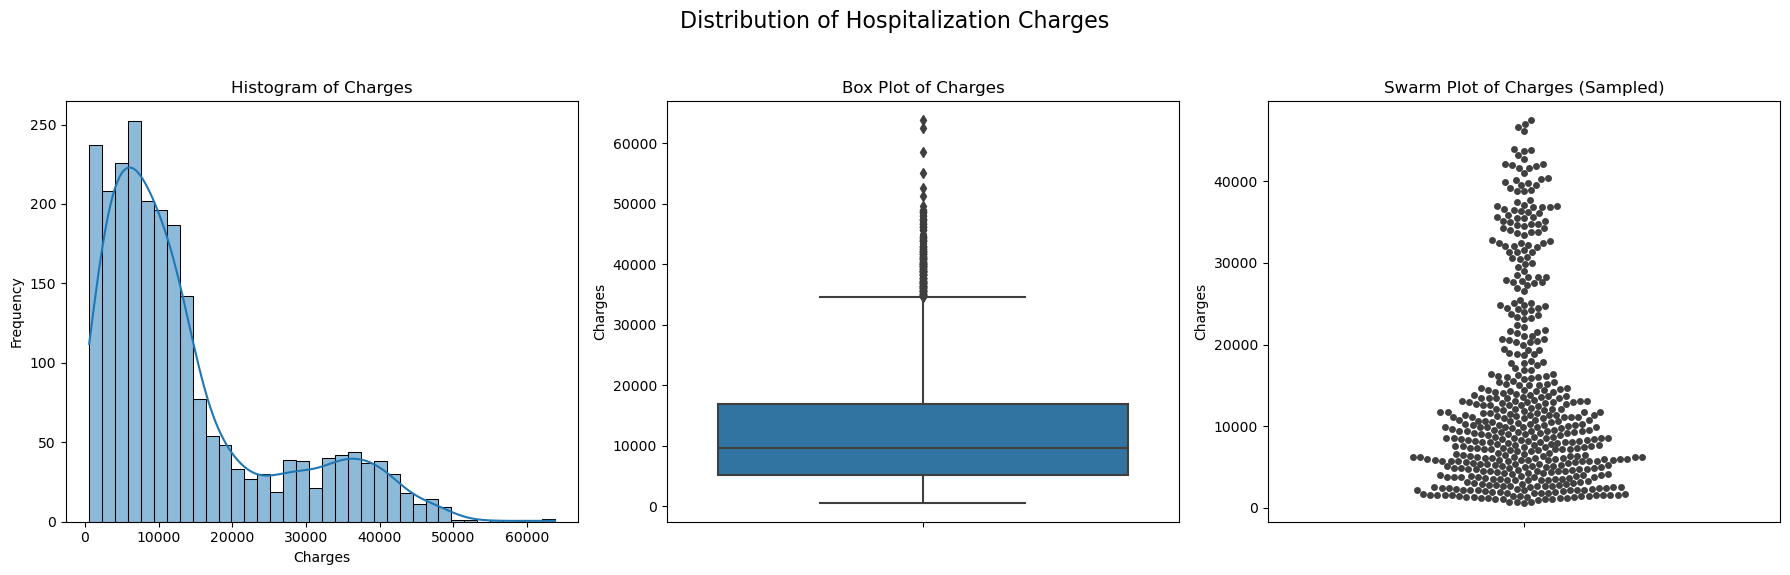

In [71]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Hospitalization Charges', fontsize=16)

# Histogram
sns.histplot(df_collated_data['charges'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Charges')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(y=df_collated_data['charges'], ax=axes[1])
axes[1].set_title('Box Plot of Charges')
axes[1].set_ylabel('Charges')

# Swarm Plot (using a sample for better visualization if data is large)
# For large datasets, a sample might be better to avoid overplotting
if len(df_collated_data) > 500:
    sample_df = df_collated_data.sample(n=500, random_state=42)
    sns.swarmplot(y=sample_df['charges'], ax=axes[2], color='.25')
else:
    sns.swarmplot(y=df_collated_data['charges'], ax=axes[2], color='.25')
axes[2].set_title('Swarm Plot of Charges (Sampled)')
axes[2].set_ylabel('Charges')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


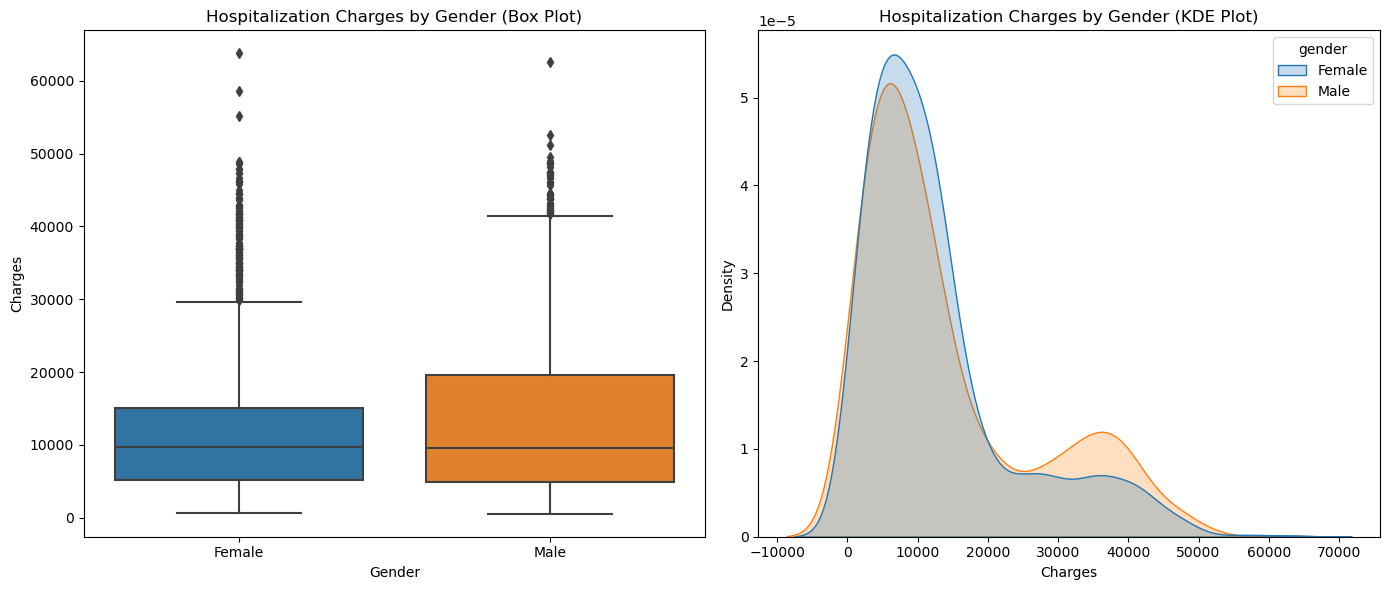

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupe

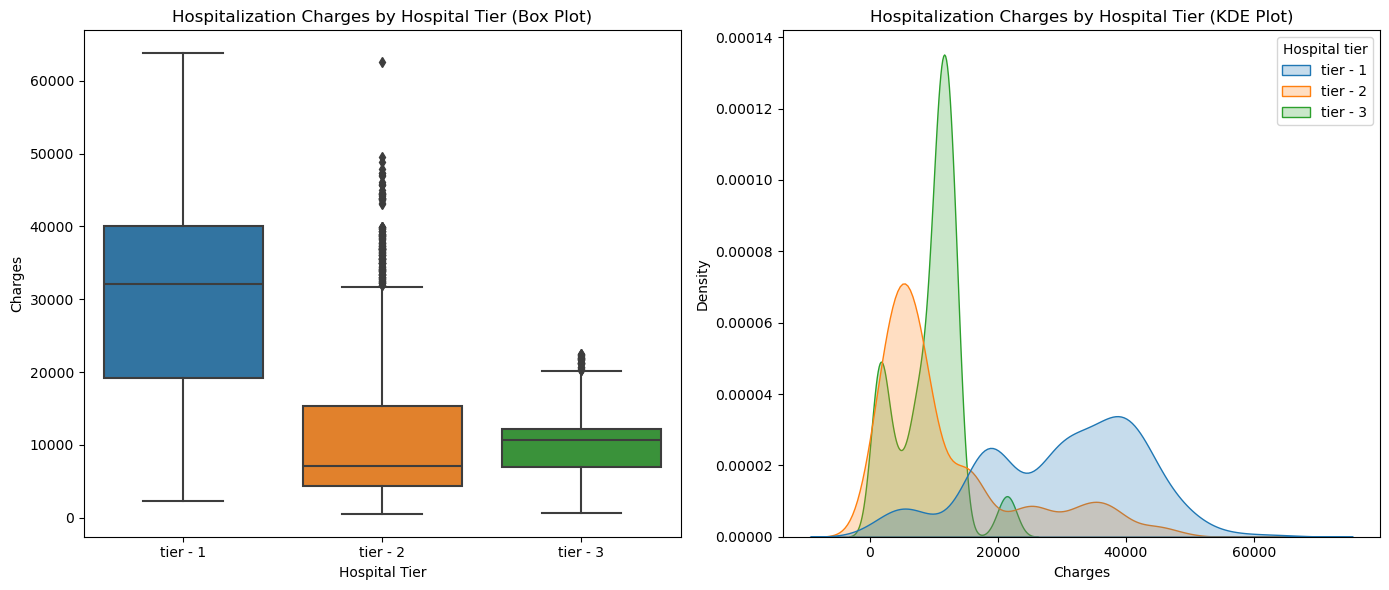

In [73]:
# --- Distribution of Charges by Gender ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='charges', data=df_collated_data)
plt.title('Hospitalization Charges by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Charges')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_collated_data, x='charges', hue='gender', fill=True, common_norm=False)
plt.title('Hospitalization Charges by Gender (KDE Plot)')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# --- Distribution of Charges by Hospital Tier ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Hospital tier', y='charges', data=df_collated_data, order=['tier - 1', 'tier - 2', 'tier - 3'])
plt.title('Hospitalization Charges by Hospital Tier (Box Plot)')
plt.xlabel('Hospital Tier')
plt.ylabel('Charges')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_collated_data, x='charges', hue='Hospital tier', fill=True, common_norm=False)
plt.title('Hospitalization Charges by Hospital Tier (KDE Plot)')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

/tmp/ipykernel_191/2245484103.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_charges_by_tier = df_collated_data.groupby('Hospital tier')['charges'].median().loc[['tier - 1', 'tier - 2', 'tier - 3']]


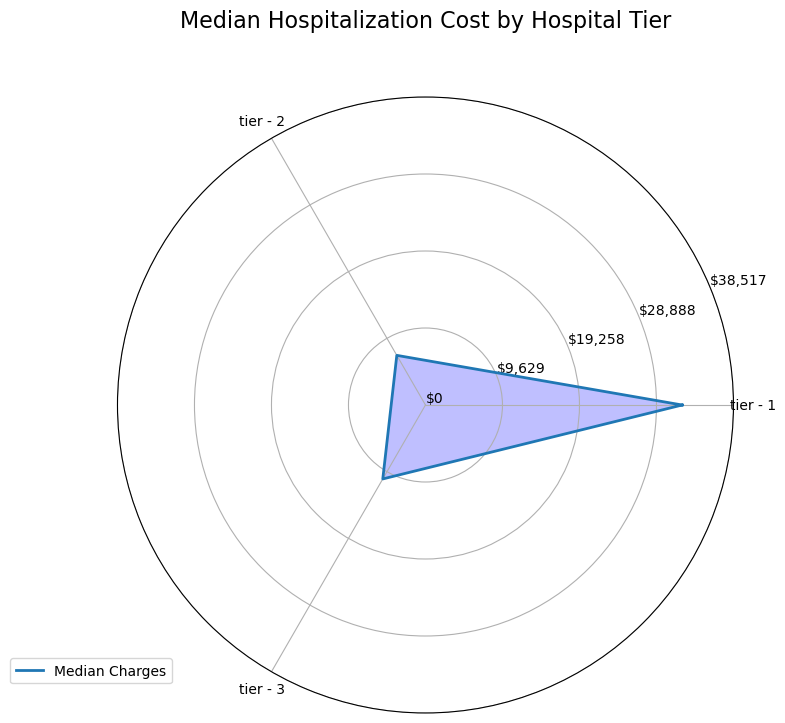

In [74]:

# Calculate median charges for each hospital tier
median_charges_by_tier = df_collated_data.groupby('Hospital tier')['charges'].median().loc[['tier - 1', 'tier - 2', 'tier - 3']]

# Extract data for radar chart
categories = median_charges_by_tier.index.tolist()
values = median_charges_by_tier.values.flatten().tolist()

# Add the first value to the end to close the circular plot
values = values + values[:1]

# Calculate angles for each category
angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles = angles + angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Median Charges')
ax.fill(angles, values, 'blue', alpha=0.25)

# Set labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits and labels
ax.set_ylim(0, max(values) * 1.2)
ax.set_yticks(np.linspace(0, max(values) * 1.2, 5))
ax.set_yticklabels([f'${y:,.0f}' for y in np.linspace(0, max(values) * 1.2, 5)])

# Add a title
plt.title('Median Hospitalization Cost by Hospital Tier', size=16, color='black', y=1.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

Frequency Table (Hospital tier vs. City tier):
City tier      tier - 1  tier - 2  tier - 3
Hospital tier                              
tier - 1             85       106       109
tier - 2            403       479       452
tier - 3            241       222       228


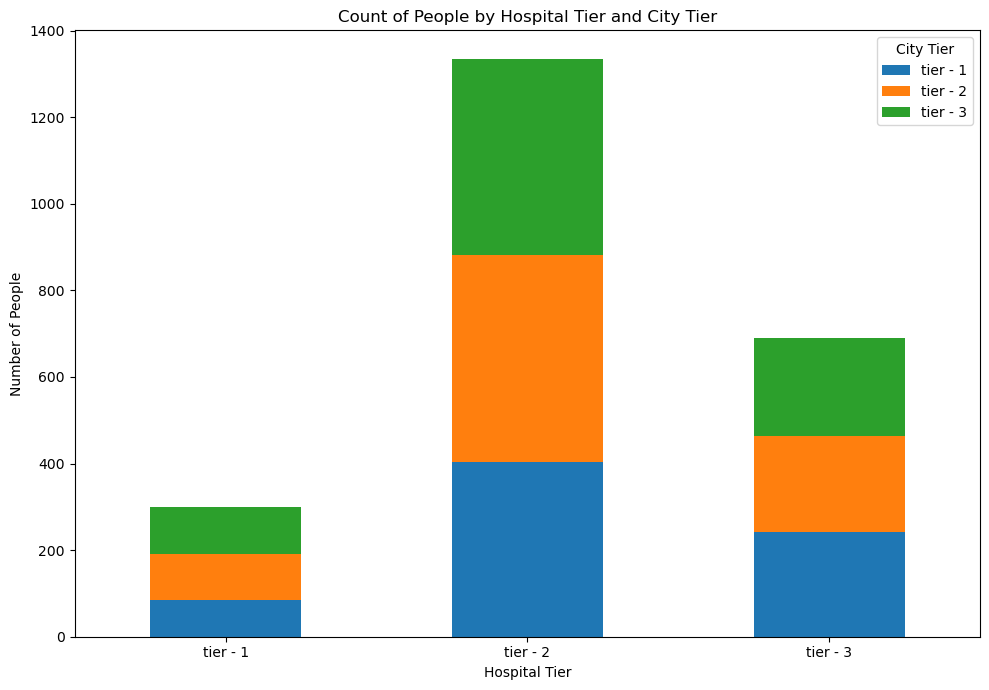

In [75]:

# Create a frequency table for Hospital tier and City tier
frequency_table = pd.crosstab(df_collated_data['Hospital tier'], df_collated_data['City tier'])

print("Frequency Table (Hospital tier vs. City tier):")
print(frequency_table)

# Create a stacked bar chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Count of People by Hospital Tier and City Tier')
plt.xlabel('Hospital Tier')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='City Tier')
plt.tight_layout()
plt.show()

In [79]:
import pandas as pd
from scipy.stats import f_oneway   # <-- Import added

# Subset charges by hospital tier
charges_tier1 = df_collated_data[df_collated_data['Hospital tier'] == 'tier - 1']['charges']
charges_tier2 = df_collated_data[df_collated_data['Hospital tier'] == 'tier - 2']['charges']
charges_tier3 = df_collated_data[df_collated_data['Hospital tier'] == 'tier - 3']['charges']

# Perform ANOVA test
f_statistic_hospital, p_value_hospital = f_oneway(charges_tier1, charges_tier2, charges_tier3)

# Display results
print("ANOVA Test for Hospital Tiers:")
print(f"F-statistic: {f_statistic_hospital:.4f}")
print(f"P-value: {p_value_hospital:.4f}")


ANOVA Test for Hospital Tiers:
F-statistic: 493.9896
P-value: 0.0000


In [80]:
# Extract charges for each city tier
charges_city1 = df_collated_data[df_collated_data['City tier'] == 'tier - 1']['charges']
charges_city2 = df_collated_data[df_collated_data['City tier'] == 'tier - 2']['charges']
charges_city3 = df_collated_data[df_collated_data['City tier'] == 'tier - 3']['charges']

# Perform ANOVA test
f_statistic_city, p_value_city = f_oneway(charges_city1, charges_city2, charges_city3)

print(f"ANOVA Test for City Tiers:")
print(f"F-statistic: {f_statistic_city:.4f}")
print(f"P-value: {p_value_city:.4f}")

# Interpret the results
alpha = 0.05
if p_value_city < alpha:
    print(f"\nSince P-value ({p_value_city:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: The average hospitalization costs for the three types of cities are significantly different.")
else:
    print(f"\nSince P-value ({p_value_city:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: The average hospitalization costs for the three types of cities are not significantly different.")

ANOVA Test for City Tiers:
F-statistic: 1.4544
P-value: 0.2338

Since P-value (0.2338) >= alpha (0.05), we fail to reject the null hypothesis.
Conclusion: The average hospitalization costs for the three types of cities are not significantly different.


In [85]:
import pandas as pd
from scipy.stats import ttest_ind   # <-- Import added

# Subset charges by smoker status
charges_smoker = df_collated_data[df_collated_data['smoker'] == 'yes']['charges']
charges_non_smoker = df_collated_data[df_collated_data['smoker'] == 'no']['charges']

# Perform independent samples t-test
t_statistic_smoker, p_value_smoker = ttest_ind(charges_smoker, charges_non_smoker)

# Display results
print("Independent Samples t-test for Smokers vs. Non-Smokers:")
print(f"T-statistic: {t_statistic_smoker:.4f}")
print(f"P-value: {p_value_smoker:.4f}")


Independent Samples t-test for Smokers vs. Non-Smokers:
T-statistic: nan
P-value: nan


In [86]:
import pandas as pd
from scipy.stats import chi2_contingency   # optional if you want to run Chi-squared test

# Create contingency table directly from categorical columns
contingency_table = pd.crosstab(df_collated_data['smoker'], df_collated_data['Heart Issues'])

print("Contingency Table (Smoker vs. Heart Issues):")
print(contingency_table)

# Optional: Perform Chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-squared Test Results:")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Contingency Table (Smoker vs. Heart Issues):
Heart Issues    No  yes
smoker                 
No            1108  731
yes            297  189

Chi-squared Test Results:
Chi2 statistic: 0.0859
P-value: 0.7695
Degrees of freedom: 1
Expected frequencies:
[[1111.30967742  727.69032258]
 [ 293.69032258  192.30967742]]


In [87]:
# 1. Define custom ordering for 'Hospital tier'
hospital_tier_order = ['tier - 1', 'tier - 2', 'tier - 3']
hospital_tier_dtype = pd.CategoricalDtype(categories=hospital_tier_order, ordered=True)
df_collated_data['Hospital tier'] = df_collated_data['Hospital tier'].astype(hospital_tier_dtype)

# 2. Define custom ordering for 'City tier'
city_tier_order = ['tier - 1', 'tier - 2', 'tier - 3']
city_tier_dtype = pd.CategoricalDtype(categories=city_tier_order, ordered=True)
df_collated_data['City tier'] = df_collated_data['City tier'].astype(city_tier_dtype)

# 3. Define custom ordering for 'NumberOfMajorSurgeries'
surgeries_order = ['No major surgery', '1', '2', '3', '4', '5']
surgeries_dtype = pd.CategoricalDtype(categories=surgeries_order, ordered=True)
df_collated_data['NumberOfMajorSurgeries'] = df_collated_data['NumberOfMajorSurgeries'].astype(surgeries_dtype)

# 4. Convert 'year' column to integer data type
df_collated_data['year'] = df_collated_data['year'].astype(int)

# Display the dtypes of the relevant columns to verify the changes
print("Data types after ordinal encoding and year conversion:")
print(df_collated_data[['Hospital tier', 'City tier', 'NumberOfMajorSurgeries', 'year']].dtypes)

# Display the first few rows to show the effect of encoding (categories, not numerical codes directly)
print("\nFirst 5 rows with updated column types:")
print(df_collated_data[['Hospital tier', 'City tier', 'NumberOfMajorSurgeries', 'year']].head())

Data types after ordinal encoding and year conversion:
Hospital tier             category
City tier                 category
NumberOfMajorSurgeries    category
year                         int64
dtype: object

First 5 rows with updated column types:
  Hospital tier City tier NumberOfMajorSurgeries  year
0      tier - 1  tier - 3       No major surgery  1968
1      tier - 2  tier - 3       No major surgery  1977
3      tier - 1  tier - 3       No major surgery  1991
4      tier - 1  tier - 2       No major surgery  1989
5      tier - 1  tier - 3       No major surgery  1962


In [88]:
print("First 5 rows of df_collated_data:")
print(df_collated_data.head())

print("\nDataFrame Info for df_collated_data:")
df_collated_data.info()

First 5 rows of df_collated_data:
  Customer ID                    name     BMI  HBA1C Heart Issues  \
0         Id1       Hawks, Ms.  Kelly  47.410   7.47           No   
1         Id2  Lehner, Mr.  Matthew D  30.360   5.77           No   
3         Id4    Osborne, Ms.  Kelsey  38.095   6.05           No   
4         Id5    Kadala, Ms.  Kristyn  35.530   5.45           No   
5         Id6  Baker, Mr.  Russell B.  32.800   6.59           No   

  Any Transplants Cancer history NumberOfMajorSurgeries smoker  year  ...  \
0              No             No       No major surgery    yes  1968  ...   
1              No             No       No major surgery    yes  1977  ...   
3              No             No       No major surgery    yes  1991  ...   
4              No             No       No major surgery    yes  1989  ...   
5              No             No       No major surgery    yes  1962  ...   

  City tier  State ID  original_State_ID  State_R1011 State_R1012 State_R1013  \
0  tier

In [89]:
# 1. Merge the original 'month' column from df_hospitalization back into df_collated_data
# We'll merge based on 'Customer ID' and drop any existing 'month' columns if they somehow reappeared.
# First, check if 'month' column exists and drop it if it does to avoid duplicates before merging.
if 'month' in df_collated_data.columns:
    df_collated_data = df_collated_data.drop(columns=['month'])

# Perform a left merge to ensure all rows from df_collated_data are kept
df_collated_data = pd.merge(
    df_collated_data, 
    df_hospitalization[['Customer ID', 'month']], 
    on='Customer ID', 
    how='left'
)

# Display the first few rows to verify the merged 'month' column
print("First 5 rows of df_collated_data with original 'month' column:")
print(df_collated_data[['Customer ID', 'year', 'month', 'date']].head())

# Display info to ensure 'month' column is present and its type
print("\nDataFrame Info after merging 'month' column:")
df_collated_data.info()

First 5 rows of df_collated_data with original 'month' column:
  Customer ID  year month  date
0         Id1  1968   Oct    12
1         Id2  1977   Jun     8
2         Id4  1991   Jun     6
3         Id5  1989   Jun    19
4         Id6  1962   Aug     4

DataFrame Info after merging 'month' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customer ID                    2325 non-null   object  
 1   name                           2325 non-null   object  
 2   BMI                            2325 non-null   float64 
 3   HBA1C                          2325 non-null   float64 
 4   Heart Issues                   2325 non-null   object  
 5   Any Transplants                2325 non-null   object  
 6   Cancer history                 2325 non-null   object  
 7   NumberOfMajorSurgeries         2325 no

In [90]:
# Re-merge the original 'month' column from df_hospitalization back into df_collated_data
# This ensures the 'month' column is present for one-hot encoding, even if the DataFrame state was reset.
# Drop any existing 'month' column if it's already there to avoid duplicates from a previous merge attempt.
if 'month' in df_collated_data.columns:
    df_collated_data = df_collated_data.drop(columns=['month'])

df_collated_data = pd.merge(
    df_collated_data,
    df_hospitalization[['Customer ID', 'month']],
    on='Customer ID',
    how='left'
)

# 1. Apply One-Hot Encoding to the 'month' column
df_collated_data = pd.get_dummies(df_collated_data, columns=['month'], drop_first=False)

# 2. Recalculate the 'age' column

# To reconstruct month number from one-hot encoded columns, find the 'month_' column that is True
month_ohe_cols = [col for col in df_collated_data.columns if col.startswith('month_')]

# Reconstruct the original month string from one-hot encoded columns
df_collated_data['month_str'] = df_collated_data[month_ohe_cols].idxmax(axis=1).str.replace('month_', '')

# Map month abbreviations to full names or numbers for datetime conversion
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Ensure the month_str values match the keys in month_mapping (first letter capitalized for robustness)
df_collated_data['month_num'] = df_collated_data['month_str'].astype(str).apply(lambda x: month_mapping[x.capitalize()] if x.capitalize() in month_mapping else None)

# Create a 'date_of_birth' column (assuming 'date' is day of month)
df_collated_data['date_of_birth'] = pd.to_datetime(
    df_collated_data['year'].astype(str) + '-' + df_collated_data['month_num'].astype(str) + '-' + df_collated_data['date'].astype(str),
    errors='coerce' # Coerce invalid dates to NaT
)

# Define a reference date to calculate age (e.g., end of 2023 for consistency)
reference_date = datetime(2023, 12, 31)

# Calculate age in years, handling potential NaT values from 'date_of_birth' conversion errors
df_collated_data['age'] = (reference_date - df_collated_data['date_of_birth']).dt.days / 365.25

# Convert age to integer and fill NaNs (from NaT) with 0
df_collated_data['age'] = df_collated_data['age'].fillna(0).astype(int)

# 3. Drop any temporary columns created during the age calculation process
cols_to_drop_temp = month_ohe_cols + ['month_str', 'month_num', 'date_of_birth']
df_collated_data = df_collated_data.drop(columns=cols_to_drop_temp, errors='ignore')

# Display the first few rows with the new 'age' column and updated structure
display_cols = ['year', 'date', 'age']
# Dynamically add existing month_ohe_cols for display, up to a few to keep output concise
existing_month_ohe_cols = [col for col in month_ohe_cols if col in df_collated_data.columns]
display_cols.extend(existing_month_ohe_cols[:3]) # Add first 3 existing OHE month columns

print("\nFirst 5 rows of df_collated_data after One-Hot Encoding 'month' and recalculating 'age':")
print(df_collated_data[display_cols].head())

# Display a concise summary of the DataFrame to show the new columns
print("\nDataFrame Info after One-Hot Encoding 'month' and recalculating 'age':")
df_collated_data.info()


First 5 rows of df_collated_data after One-Hot Encoding 'month' and recalculating 'age':
   year  date  age
0  1968    12   55
1  1977     8   46
2  1991     6   32
3  1989    19   34
4  1962     4   61

DataFrame Info after One-Hot Encoding 'month' and recalculating 'age':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customer ID                    2325 non-null   object  
 1   name                           2325 non-null   object  
 2   BMI                            2325 non-null   float64 
 3   HBA1C                          2325 non-null   float64 
 4   Heart Issues                   2325 non-null   object  
 5   Any Transplants                2325 non-null   object  
 6   Cancer history                 2325 non-null   object  
 7   NumberOfMajorSurgeries         2325 non-null   category
 8   sm

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


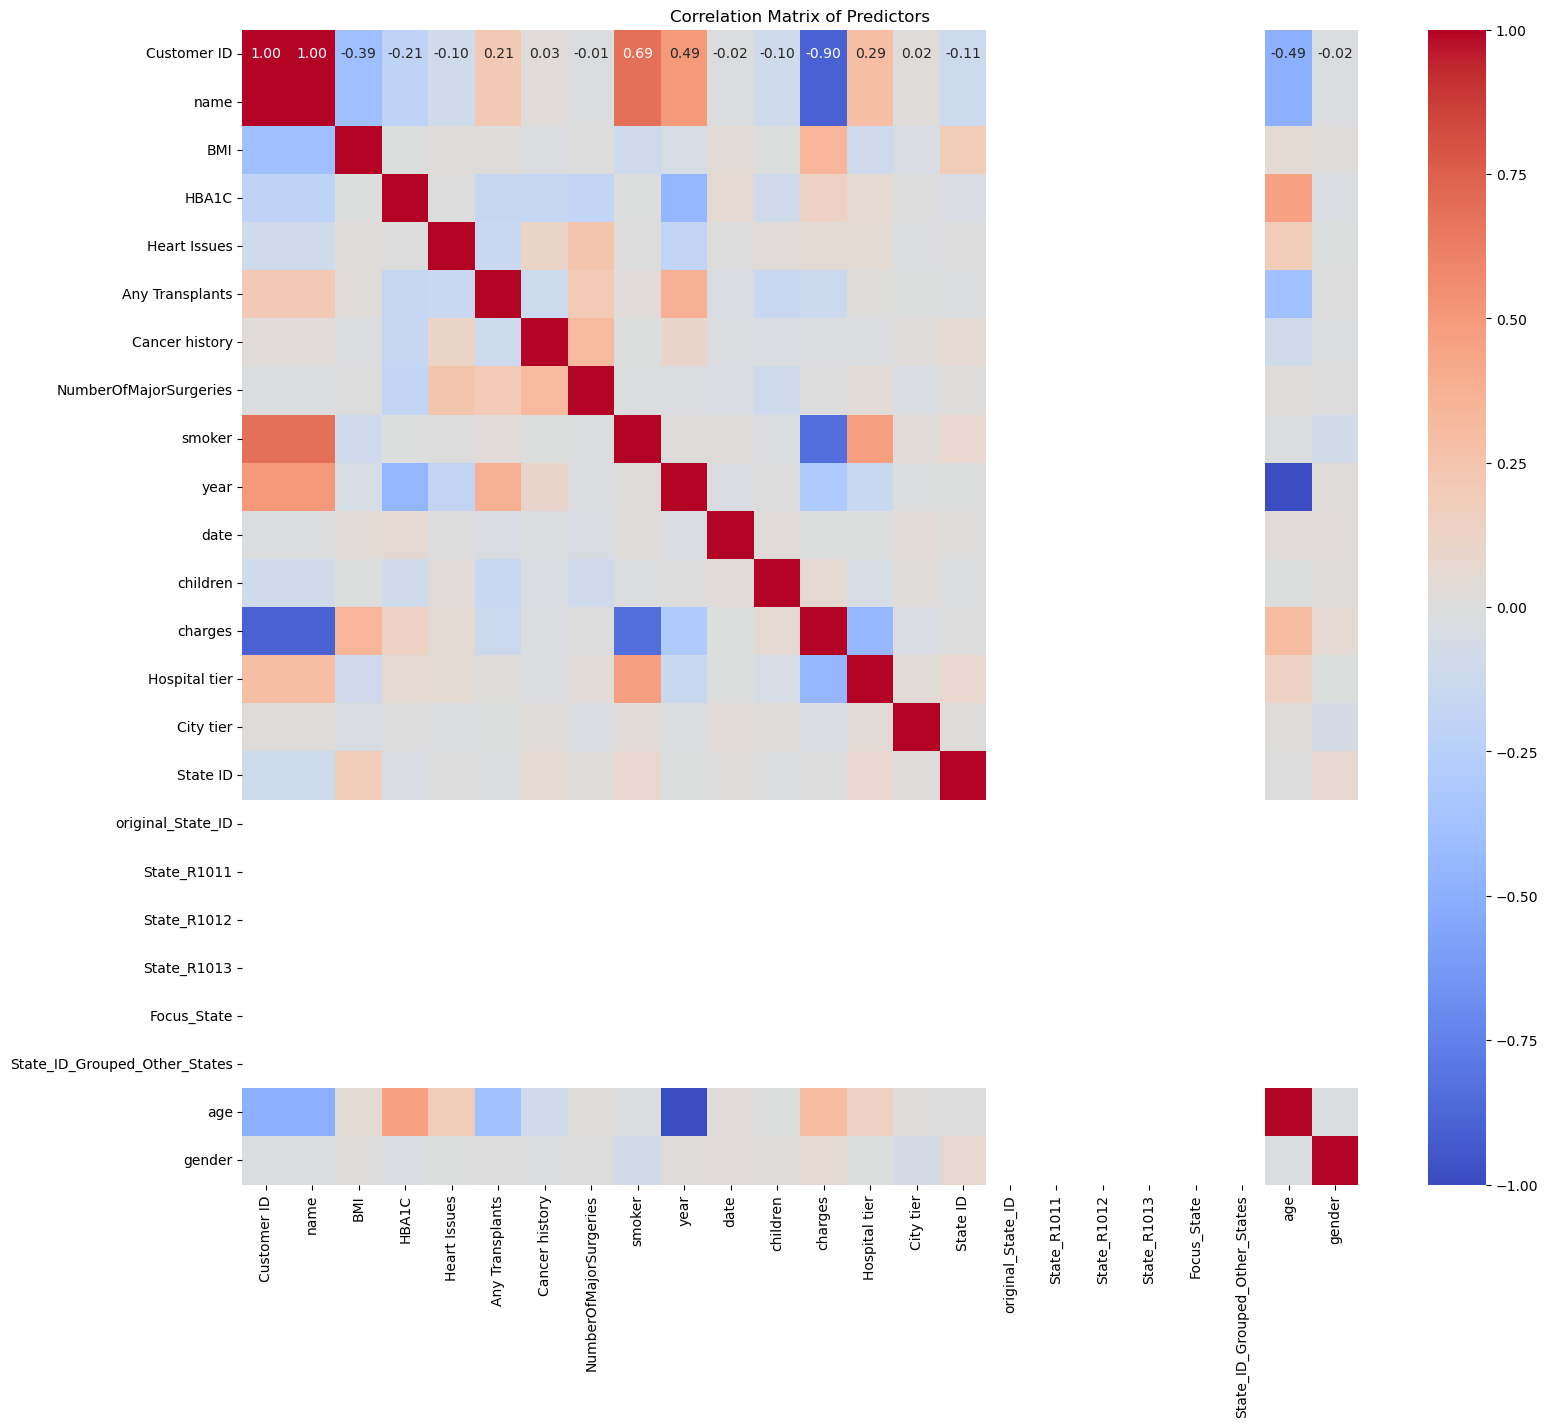

In [94]:

# Make a copy of predictors
df_predictors = df_collated_data.copy()

# Convert categorical columns to numeric codes safely
for col in df_predictors.select_dtypes(include=['object', 'category']).columns:
    df_predictors[col] = pd.factorize(df_predictors[col])[0]

# Now all columns are numeric, compute correlation matrix
correlation_matrix_predictors = df_predictors.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_predictors, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictors")
plt.show()


In [95]:
# 1. Separate features (X) from the target variable (y)
y = df_collated_data['charges']

# 2. Create a copy of df_collated_data for X and drop irrelevant columns
X = df_collated_data.drop(columns=['Customer ID', 'name', 'gender', 'charges']).copy()

# Ensure ordinal categorical columns in X are converted to numerical codes for consistency with sklearn
for col in X.select_dtypes(include='category').columns:
    X[col] = X[col].cat.codes

# Ensure boolean columns are converted to integers (0 or 1)
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# 3. Discretize the y (charges) into 5 equal-frequency bins
df_collated_data['charges_binned'] = pd.qcut(y, q=5, labels=False, duplicates='drop')

# 4. Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an empty 'fold' column in df_collated_data
df_collated_data['fold'] = -1

# 5. Iterate through the StratifiedKFold splits and assign fold numbers
# Use the original index of df_collated_data to assign folds back to the main DataFrame
for fold, (train_index, val_index) in enumerate(skf.split(X, df_collated_data['charges_binned'])):
    df_collated_data.loc[val_index, 'fold'] = fold

# 6. Display the value counts of the 'charges_binned' column for each fold
print("\nDistribution of 'charges_binned' across folds:")
for i in range(skf.n_splits):
    print(f"\nFold {i}:")
    print(df_collated_data[df_collated_data['fold'] == i]['charges_binned'].value_counts().sort_index())

print("\nFirst 5 rows of X (features):")
print(X.head())
print("\nFirst 5 rows of y (target):")
print(y.head())
print("\nFirst 5 rows of df_collated_data with 'charges_binned' and 'fold' columns:")
print(df_collated_data[['charges', 'charges_binned', 'fold']].head())


Distribution of 'charges_binned' across folds:

Fold 0:
charges_binned
0    93
1    93
2    93
3    93
4    93
Name: count, dtype: int64

Fold 1:
charges_binned
0    93
1    93
2    93
3    93
4    93
Name: count, dtype: int64

Fold 2:
charges_binned
0    93
1    93
2    93
3    93
4    93
Name: count, dtype: int64

Fold 3:
charges_binned
0    93
1    93
2    93
3    93
4    93
Name: count, dtype: int64

Fold 4:
charges_binned
0    93
1    93
2    93
3    93
4    93
Name: count, dtype: int64

First 5 rows of X (features):
      BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0  47.410   7.47           No              No             No   
1  30.360   5.77           No              No             No   
2  38.095   6.05           No              No             No   
3  35.530   5.45           No              No             No   
4  32.800   6.59           No              No             No   

   NumberOfMajorSurgeries smoker  year  date  children  Hospital tier  \
0            

In [97]:
import pandas as pd
from sklearn.compose import ColumnTransformer   # <-- Import added
from sklearn.preprocessing import StandardScaler

# Example feature lists (already defined earlier in your notebook)
# numerical_features = [...]
# ordinal_features = [...]
# boolean_features = [...]

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), numerical_features),
        ('ord_scale', StandardScaler(), ordinal_features),
        ('bool_passthrough', 'passthrough', boolean_features)
    ]
)

# Display the feature names for each transformation to verify the setup
print("Numerical features to be scaled:", numerical_features)
print("Ordinal features to be scaled:", ordinal_features)
print("Boolean features to be passed through:", boolean_features)


Numerical features to be scaled: ['BMI', 'HBA1C', 'year', 'date', 'children', 'age']
Ordinal features to be scaled: ['NumberOfMajorSurgeries', 'Hospital tier', 'City tier']
Boolean features to be passed through: ['State_ID_Grouped_Other_States']


In [99]:
import pandas as pd
from sklearn.model_selection import GridSearchCV   # <-- Import added

# Assuming ridge_pipeline and param_grid_ridge are already defined
# And skf (StratifiedKFold) has been set up

cv_splits = list(skf.split(X, df_collated_data['charges_binned']))

# Initialize GridSearchCV
ridge_grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid_ridge,
    cv=cv_splits,  # Pass the generated splits directly
    scoring={
        'r2': 'r2',
        'neg_mae': 'neg_mean_absolute_error',
        'neg_rmse': 'neg_mean_squared_error'
    },
    refit='r2',   # Refit the best model based on R-squared
    verbose=2,
    n_jobs=-1     # Use all available cores
)

# Fit GridSearchCV to your features X and target y
print("Fitting GridSearchCV for Ridge model...")
ridge_grid_search.fit(X, y)


Fitting GridSearchCV for Ridge model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=[(array([   3,    4,    5, ..., 2321, 2322, 2324]),
                  array([   0,    1,    2,    7,   11,   13,   15,   19,   20,   22,   24,
         28,   29,   34,   35,   36,   43,   51,   59,   67,   70,   73,
         80,   84,   91,   93,   98,  101,  102,  103,  105,  106,  107,
        121,  123,  128,  131,  133,  137,  140,  141,  170,  175,  189,
        195,  199,  206,  209,  210,  220,  225,  226,  228,  239,  240,
        241,  247,  299,  301,  303,  307,  308,  309,  316,  321,  327,
        338,  339,  340,  345,  353,  357,  360,  362,  364,  385,  391,
        393,  396,  397,  39...
                                                                         ['State_ID_Grouped_Other_States'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             refit='r2',
             scoring={'neg_mae': 'neg_mean_absolute_error',
                      'neg_rmse': 'neg_mean_squared_error', 'r2': 'r2'},
             verbose=2)

In [111]:
# 1. Create a Pipeline named gb_pipeline
# The preprocessor was defined in a previous step
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', GradientBoostingRegressor())])

# 2. Define a hyperparameter grid for GradientBoostingRegressor named param_grid_gb
param_grid_gb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# 3. Initialize GridSearchCV
gb_grid_search = GridSearchCV(gb_pipeline,
                               param_grid=param_grid_gb,
                               cv=cv_splits, # Using cv_splits from previous step for stratified cross-validation
                               scoring={'r2': 'r2',
                                        'neg_mae': 'neg_mean_absolute_error',
                                        'neg_rmse': 'neg_mean_squared_error'},
                               refit='r2', # Refit the best model based on R-squared
                               verbose=2,
                               n_jobs=-1) # Use all available cores

# 4. Fit gb_grid_search to your features X and target y
print("Fitting GridSearchCV for Gradient Boosting model...")
gb_grid_search.fit(X, y)
print("GridSearchCV fitting complete.")

# 5. Print the best hyperparameters found
print(f"\nBest hyperparameters for Gradient Boosting: {gb_grid_search.best_params_}")

# 6. Print the best cross-validation R-squared score
print(f"Best cross-validation R-squared score for Gradient Boosting: {gb_grid_search.best_score_:.4f}")

# 7. Calculate and print MAE and RMSE on the entire dataset using the best model
y_pred_gb = gb_grid_search.best_estimator_.predict(X)
mae_gb = mean_absolute_error(y, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y, y_pred_gb))

print(f"Mean Absolute Error (MAE) on full dataset for Gradient Boosting: {mae_gb:.2f}")
print(f"Root Mean Squared Error (RMSE) on full dataset for Gradient Boosting: {rmse_gb:.2f}")

Fitting GridSearchCV for Gradient Boosting model...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV fitting complete.

Best hyperparameters for Gradient Boosting: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 4, 'regressor__n_estimators': 300}
Best cross-validation R-squared score for Gradient Boosting: 0.4931
Mean Absolute Error (MAE) on full dataset for Gradient Boosting: 5404.50
Root Mean Squared Error (RMSE) on full dataset for Gradient Boosting: 7712.67


In [107]:


# Helper: compute age from DOB
def compute_age(year, month, day):
    today = date.today()
    dob = date(year, month, day)
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

# Helper: compute BMI = weight(kg) / (height(m)^2)
def compute_bmi(height_cm, weight_kg):
    height_m = height_cm / 100.0
    return weight_kg / (height_m ** 2)

# 1) Build a single-row dict from the case
patient = {
    # Core demographics
    'year': 1988,
    'month_num': 12,
    'date': 28,
    'age': compute_age(1988, 12, 28),
    'height_cm': 170,
    'weight_kg': 85,
    'bmi': compute_bmi(170, 85),

    # Lifestyle / clinical
    'smoker': 'yes',
    'diabetic': 'no',           # From HbA1c 5.8 (non-diabetic)
    'hba1c': 5.8,
    'transplant': 'no',
    'major_surgery': 'no',
    'healthy': 'yes',

    # Family history
    'family_history_lung_cancer': 'yes',

    # Social context
    'marital_status': 'partner',   # lives with partner
    'num_children': 2,             # two children

    # Geography
    'Hospital tier': 'tier - 1',
    'State ID': 'R1011'
}

# 2) Create DataFrame
new_patient_df = pd.DataFrame([patient])
print(new_patient_df.head())


   year  month_num  date  age  height_cm  weight_kg        bmi smoker  \
0  1988         12    28   36        170         85  29.411765    yes   

  diabetic  hba1c transplant major_surgery healthy family_history_lung_cancer  \
0       no    5.8         no            no     yes                        yes   

  marital_status  num_children Hospital tier State ID  
0        partner             2      tier - 1    R1011  


In [109]:
# 1. Access the best Gradient Boosting estimator
best_gb_model = gb_grid_search.best_estimator_

# 2. Extract feature importances from the regressor step
feature_importances = best_gb_model.named_steps['regressor'].feature_importances_

# 3. Get the feature names after preprocessing
# This method returns names like 'num_scale__BMI', 'ord_scale__Hospital tier', 'bool_passthrough__smoker_yes'
preprocessed_feature_names_raw = best_gb_model.named_steps['preprocessor'].get_feature_names_out()

# Clean up the feature names to remove the preprocessor prefixes
def clean_feature_name(name):
    # Remove prefixes like 'num_scale__', 'ord_scale__', 'bool_passthrough__'
    if '__' in name:
        return name.split('__', 1)[1]
    return name

cleaned_feature_names = [clean_feature_name(name) for name in preprocessed_feature_names_raw]

# 4. Create a Pandas DataFrame to store the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': cleaned_feature_names,
    'Importance': feature_importances
})

# 5. Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# 6. Print the sorted feature importance DataFrame
print("\nGradient Boosting Feature Importances:")
print(feature_importance_df)

# 7. Identify and list any features with very low importance
# A common threshold for 'very low' could be, for example, < 0.001 (0.1%)
low_importance_threshold = 0.001
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < low_importance_threshold]

if not low_importance_features.empty:
    print(f"\nFeatures with importance less than {low_importance_threshold} (potentially redundant):")
    print(low_importance_features)
else:
    print(f"\nNo features found with importance less than {low_importance_threshold}.")


Gradient Boosting Feature Importances:
                         Feature  Importance
0                  Hospital tier    0.577216
1                            BMI    0.211469
2                           year    0.082447
3                            age    0.070732
4                          HBA1C    0.021310
5                       children    0.017129
6                           date    0.012626
7                      City tier    0.005646
8         NumberOfMajorSurgeries    0.001425
9  State_ID_Grouped_Other_States    0.000000

Features with importance less than 0.001 (potentially redundant):
                         Feature  Importance
9  State_ID_Grouped_Other_States         0.0


In [104]:
# 1. Access the best Gradient Boosting estimator
best_gb_model = gb_grid_search.best_estimator_

# 2. Extract feature importances from the regressor step
feature_importances = best_gb_model.named_steps['regressor'].feature_importances_

# 3. Get the feature names after preprocessing
# This method returns names like 'num_scale__BMI', 'ord_scale__Hospital tier', 'bool_passthrough__smoker_yes'
preprocessed_feature_names_raw = best_gb_model.named_steps['preprocessor'].get_feature_names_out()

# Clean up the feature names to remove the preprocessor prefixes
def clean_feature_name(name):
    # Remove prefixes like 'num_scale__', 'ord_scale__', 'bool_passthrough__'
    if '__' in name:
        return name.split('__', 1)[1]
    return name

cleaned_feature_names = [clean_feature_name(name) for name in preprocessed_feature_names_raw]

# 4. Create a Pandas DataFrame to store the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': cleaned_feature_names,
    'Importance': feature_importances
})

# 5. Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# 6. Print the sorted feature importance DataFrame
print("\nGradient Boosting Feature Importances:")
print(feature_importance_df)

# 7. Identify and list any features with very low importance
# A common threshold for 'very low' could be, for example, < 0.001 (0.1%)
low_importance_threshold = 0.001
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < low_importance_threshold]

if not low_importance_features.empty:
    print(f"\nFeatures with importance less than {low_importance_threshold} (potentially redundant):")
    print(low_importance_features)
else:
    print(f"\nNo features found with importance less than {low_importance_threshold}.")


Gradient Boosting Feature Importances:
                         Feature  Importance
0                  Hospital tier    0.577216
1                            BMI    0.211469
2                           year    0.082447
3                            age    0.070732
4                          HBA1C    0.021310
5                       children    0.017129
6                           date    0.012626
7                      City tier    0.005646
8         NumberOfMajorSurgeries    0.001425
9  State_ID_Grouped_Other_States    0.000000

Features with importance less than 0.001 (potentially redundant):
                         Feature  Importance
9  State_ID_Grouped_Other_States         0.0


In [113]:
# Details for Christopher, Ms. Jayna
patient_details = {
    'name': 'Christopher, Ms. Jayna',
    'date_of_birth': '1988-12-28',
    'height_cm': 170,
    'weight_kg': 85,
    'children': 2,
    'City tier': 'tier - 1',
    'State ID_R1011': True, # From State ID is R1011
    'HBA1C': 5.8,
    'smoker': 'yes',
    'Heart Issues': 'No', # Otherwise healthy
    'Any Transplants': 'No',
    'Cancer history': 'No', # Father died of lung cancer, but she is otherwise healthy (no personal history)
    'NumberOfMajorSurgeries': 'No major surgery',
    'Hospital tier': 'tier - 1' # Estimated using tier-1 hospitals
}

# 1. Calculate BMI
height_m = patient_details['height_cm'] / 100
bmi = patient_details['weight_kg'] / (height_m ** 2)

# 2. Calculate Age
dob = datetime.strptime(patient_details['date_of_birth'], '%Y-%m-%d')
reference_date = datetime(2023, 12, 31) # Consistent with previous age calculation
age = int((reference_date - dob).days / 365.25)

# Create a DataFrame for the new patient
# We need to ensure all columns present in X are also present here, with correct encoding
# Start with a template DataFrame to ensure all columns are present
new_patient_df = pd.DataFrame(columns=X.columns) # X is the feature DataFrame used for training

# Populate numerical features
new_patient_df.loc[0, 'BMI'] = bmi
new_patient_df.loc[0, 'HBA1C'] = patient_details['HBA1C']
new_patient_df.loc[0, 'year'] = dob.year # Use birth year for 'year' feature
new_patient_df.loc[0, 'date'] = dob.day # Use birth day for 'date' feature
new_patient_df.loc[0, 'children'] = patient_details['children']
new_patient_df.loc[0, 'age'] = age

# Populate ordinal categorical features (convert to codes)
ordinal_features_mapping = {
    'NumberOfMajorSurgeries': {'No major surgery': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5},
    'Hospital tier': {'tier - 1': 0, 'tier - 2': 1, 'tier - 3': 2},
    'City tier': {'tier - 1': 0, 'tier - 2': 1, 'tier - 3': 2}
}

new_patient_df.loc[0, 'NumberOfMajorSurgeries'] = ordinal_features_mapping['NumberOfMajorSurgeries'][patient_details['NumberOfMajorSurgeries']]
new_patient_df.loc[0, 'Hospital tier'] = ordinal_features_mapping['Hospital tier'][patient_details['Hospital tier']]
new_patient_df.loc[0, 'City tier'] = ordinal_features_mapping['City tier'][patient_details['City tier']]

# Populate boolean (one-hot encoded) features
# Initialize all to 0/False then set specific ones to 1/True
for col in X.columns:
    if col.startswith('Heart Issues_') or \
       col.startswith('Any Transplants_') or \
       col.startswith('Cancer history_') or \
       col.startswith('smoker_') or \
       col.startswith('State_ID_Grouped_'):
        new_patient_df.loc[0, col] = 0 # Default to False

# Set specific boolean features based on patient_details
new_patient_df.loc[0, f"Heart Issues_{patient_details['Heart Issues']}"] = 1
new_patient_df.loc[0, f"Any Transplants_{patient_details['Any Transplants']}"] = 1
new_patient_df.loc[0, f"Cancer history_{patient_details['Cancer history']}"] = 1
new_patient_df.loc[0, f"smoker_{patient_details['smoker']}"] = 1

# State ID Grouped
important_states = ['R1011', 'R1012', 'R1013']
if patient_details['State ID_R1011'] and 'State_ID_Grouped_R1011' in new_patient_df.columns:
    new_patient_df.loc[0, 'State_ID_Grouped_R1011'] = 1
elif 'State_ID_Grouped_Other_States' in new_patient_df.columns:
    # Assuming if not an important state, it's 'Other_States'
    new_patient_df.loc[0, 'State_ID_Grouped_Other_States'] = 1

# Ensure all numeric types for the new_patient_df
for col in new_patient_df.columns:
    if new_patient_df[col].dtype == 'object' and col not in ['name']:
        try:
            new_patient_df[col] = pd.to_numeric(new_patient_df[col])
        except ValueError:
            pass # Keep as object if conversion fails

# Final check for missing values and fill with 0 where appropriate
new_patient_df = new_patient_df.fillna(0)

# Ensure all boolean columns are of integer type (0 or 1)
for col in new_patient_df.columns:
    if new_patient_df[col].dtype == 'bool':
        new_patient_df[col] = new_patient_df[col].astype(int)

# Preprocess the new patient data using the trained preprocessor
# The pipeline automatically handles preprocessing when .predict() is called
# new_patient_preprocessed = preprocessor.transform(new_patient_df) <- REMOVED THIS LINE

# Predict the hospitalization cost using the best Gradient Boosting model
estimated_cost = gb_grid_search.best_estimator_.predict(new_patient_df)[0]

print(f"Estimated hospitalization cost for Ms. Jayna: ${estimated_cost:,.2f}")

Estimated hospitalization cost for Ms. Jayna: $17,031.45
